In [1]:
import scipy.io
import sklearn
import numpy as np
import sklearn.linear_model
import sklearn.cross_decomposition
import sklearn.ensemble
import sklearn.gaussian_process
import sklearn.gaussian_process.kernels
import sklearn.tree
import sklearn.neural_network
import sklearn.svm
import sklearn.ensemble
import sklearn.metrics
import time
import matplotlib
import matplotlib.pyplot as plt

dataset = scipy.io.loadmat('toy_20_25000_11_096.mat')
X_train = dataset['X']
X_test = dataset['Xt']
y_train = dataset['Y']
y_test = dataset['Yt']
labels = ["Linear","DecisionTree","GaussianProcess","MLP"]
rmse = []
final = []
maxx = []
minn = []
usetime = []
linear = []
decision = []
gaus = []
mlp = []

In [2]:
total = 0
for i in y_test:
    total += i
mean = total / len(y_test)
sst = 0
for i in y_test:
    sst += (i - mean) * (i - mean)
sst /= len(y_test)

In [3]:
def avg(a):
    sum = 0
    for i in a:
        sum += i
    sum = sum * 1.0 / len(a)
    return sum

In [4]:
def findmin(a):
    ans = a[0]
    for i in a:
        if i < ans:
            ans = i
    return ans

In [5]:
def findmax(a):
    ans = a[0]
    for i in a:
        if i > ans:
            ans = i
    return ans

In [6]:
for i in range(0,5):
    start = time.time()
    reg = sklearn.linear_model.LinearRegression().fit(X_train,y_train)
    end = time.time()
    linear.append(reg.score(X_test,y_test))
    if i == 0:
        use = end - start
        usetime.append(use)
        rmse.append(sklearn.metrics.mean_squared_error(y_test,reg.predict(X_test),squared = False))
final.append(avg(linear))
maxx.append(findmax(linear))
minn.append(findmin(linear))

In [7]:
for i in range(0,5):
    start = time.time()
    reg = sklearn.tree.DecisionTreeRegressor(random_state = i,max_depth = 20,max_leaf_nodes = 500)
    reg.fit(X_train,y_train)
    end = time.time()
    decision.append(reg.score(X_test,y_test))
    if i == 0:
        use = end - start
        usetime.append(use)
        rmse.append(sklearn.metrics.mean_squared_error(y_test,reg.predict(X_test),squared = False))
final.append(avg(decision))
maxx.append(findmax(decision))
minn.append(findmin(decision))  

In [8]:
for i in range(0,5):
    start = time.time()
    kernel = 5.0 * sklearn.gaussian_process.kernels.RBF(1.0)
    gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel = kernel,random_state = i).fit(X_train,y_train)
    end = time.time()
    gaus.append(gpr.score(X_test,y_test))
    if i == 0:
        use = end - start
        usetime.append(use)
        rmse.append(sklearn.metrics.mean_squared_error(y_test,gpr.predict(X_test),squared = False))
final.append(avg(gaus))
maxx.append(findmax(gaus))
minn.append(findmin(gaus))  

In [9]:
for i in range(0,5):
    start = time.time()
    reg = sklearn.neural_network.MLPRegressor(random_state = i,max_iter = 500).fit(X_train,y_train.ravel())
    end = time.time()
    mlp.append(reg.score(X_test,y_test.ravel()))
    print(reg.score(X_test,y_test.ravel()))
    if i == 0:
        use = end - start
        usetime.append(use)
        rmse.append(sklearn.metrics.mean_squared_error(y_test,reg.predict(X_test),squared = False))
final.append(avg(mlp))
maxx.append(findmax(mlp))
minn.append(findmin(mlp))

0.9739813883799737
0.9684203325808812
0.969986524958365
0.9722478452761886
0.9718299579443346


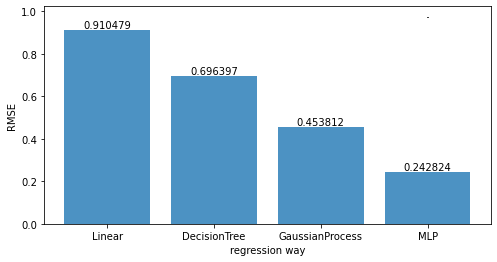

In [12]:
params = {'figure.figsize': '8, 4'}
plt.rcParams.update(params)
plt.xlabel("regression way")
plt.ylabel("RMSE")
plt.bar(x = labels,height = rmse,alpha = 0.8)
for i, j in zip(labels, rmse):
    plt.text(i, j ,"%.6f" % j, ha = 'center', va = 'bottom', fontsize = 10, rotation = 0)
for i in range(0,4):
    plt.vlines(i,minn[i],maxx[i], colors = "black")
plt.show()

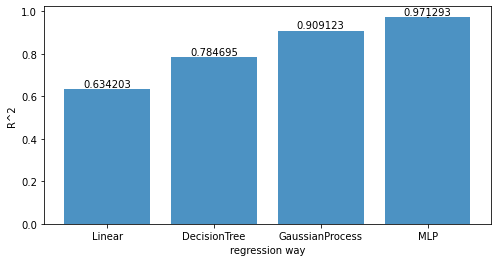

In [13]:
params = {'figure.figsize': '8, 4'}
plt.rcParams.update(params)
plt.xlabel("regression way")
plt.ylabel("R^2")
plt.bar(x = labels,height = final,alpha = 0.8)
for i, j in zip(labels, final):
    plt.text(i, j ,"%.6f" % j, ha = 'center', va = 'bottom', fontsize = 10, rotation = 0)
for i in range(0,4):
    plt.vlines(i,minn[i],maxx[i], colors = "black")
plt.show()

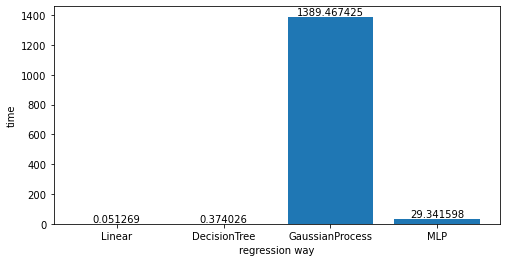

In [14]:
plt.figure(0)
params = {'figure.figsize': '8, 4'}
plt.rcParams.update(params)
plt.xlabel("regression way")
plt.ylabel("time")
plt.bar(x = labels,height = usetime)
for i, j in zip(labels, usetime):
    plt.text(i, j ,"%.6f" % j, ha = 'center', va = 'bottom', fontsize = 10, rotation = 0)
plt.show()